### ITAM
## Métodos Numéricos y Optimización 
*(MAT-34420)*
# Práctica 2 
# Álgebra Lineal Numérica

#### Lauro Reyes Rosas - 214532
#### Ximena Paz

## Análisis de Componentes Principales (PCA)

In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# leer datos
#data = pd.read_csv('data/winequality-red.csv')
data = pd.read_csv('data/breast_cancer.csv')

1. Prepara los datos: para cada variable, centra alrededor del cero restando las medias y estandariza la escala dividiendo entre la varianza (np.std). Haz un mapa de calor con la matriz de correlaciones de la base de datos estandarizada.

In [2]:
target = 'diagnosis' #quality
to_drop = ['Unnamed: 32','id']
data = data.drop(columns=to_drop)

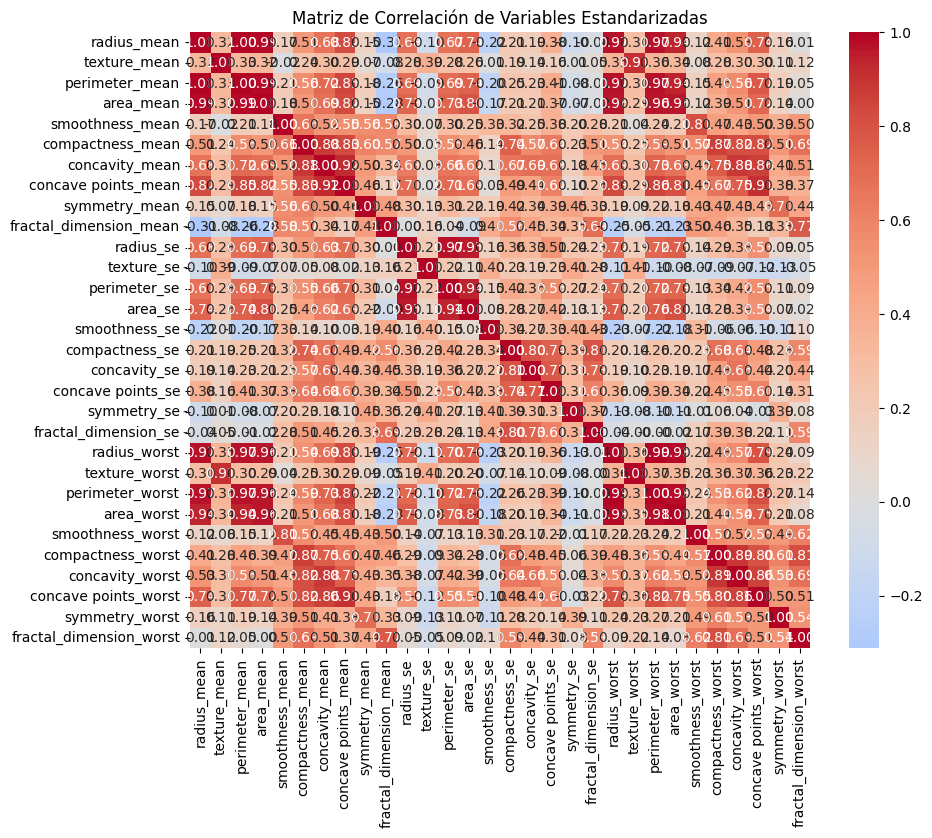

In [3]:
# separar variable objetivo
X = data.drop(target, axis=1)
y = data[target]
# standardized
X_standardized = (X - X.mean()) / X.std()
correlation_matrix = X_standardized.corr()
# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlación de Variables Estandarizadas")
plt.show()

2. Realiza la reducción de dimensionalidad mediante PCA calculando los eigenvalores y eigenvectores de la matriz de varianza-covarianza $(A^{T}A)$.

In [4]:
A = X_standardized.values
cov_matrix = np.cov(A.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print("Eigenvalores:")
print(eigenvalues[:3])
print("\nEigenvectores:")
print(eigenvectors[:3])

Eigenvalores:
[13.28160768  5.69135461  2.81794898]

Eigenvectores:
[[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -4.96986642e-02
   6.85700057e-02 -7.29289034e-02  9.85526942e-02 -1.82579441e-01
   1.92264989e-02  1.29476396e-01 -1.31526670e-01 -2.11194013e-01
   2.11460455e-01 -7.02414091e-01]
 [ 1.03724578e-01 -5.97060883e-02  6.45499033e-02 -6.03050001e-01
   4.94688505e-02 -3.21788366e-02 -1.13995382e-02 -1.30674825e-01
   1.12699390e-01  2.40934066e-01 -3.02243402e-01  2.54896423e-01
   2.03461333e-01  2.15600995e-02  1.07922421e-01 -1.57841960e-01
  -3.87061187e-02 -4.11029851e-02 -2.97886446e-02 -2.44134993e-01
  -4.48369467e-01 -9.48006326e-02  5.54997454e-04  9.87867898e-02
  -8.47459309e-02  2.45566636e-02 -1.73

3. Calcula la varianza total acumulada en las primeras k componentes principales.

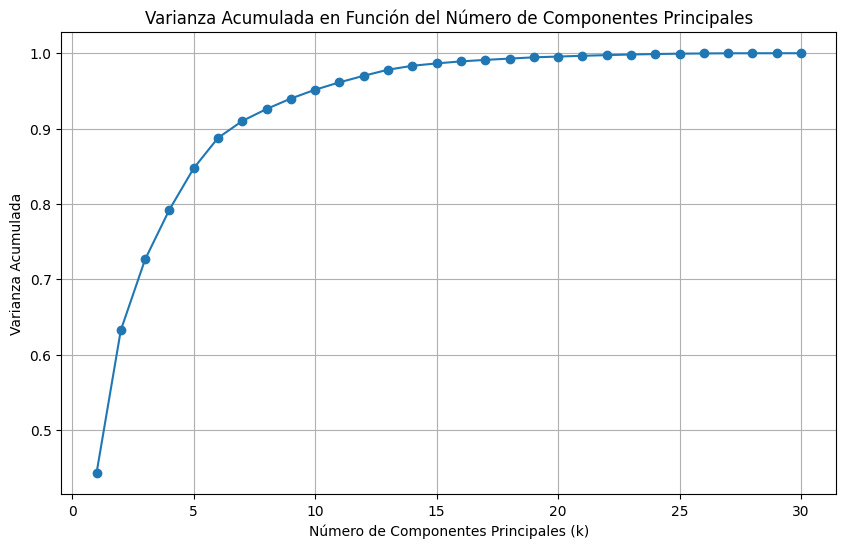

In [5]:
varianza_acumulada_vals = [np.sum(eigenvalues[:k]) / np.sum(eigenvalues) for k in range(1, len(eigenvalues) + 1)]
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), varianza_acumulada_vals, marker='o', linestyle='-')
plt.xlabel("Número de Componentes Principales (k)")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada en Función del Número de Componentes Principales")
plt.grid(True)
plt.show()

4. Analizando la forma de calcular la proyección $(Y=AV)$, identifica los coeficientes de cada variable en las primeras componentes principales. Discute lo observado: ¿cuáles son las variables que más contribuyen con cada componente? Compara estos resultados con la matriz de correlaciones del paso 1.

In [6]:
loadings = pd.DataFrame(eigenvectors, columns=[f'CP{i+1}' for i in range(len(eigenvalues))])
loadings.index = X.columns
print("\nCargas de las variables en los primeros dos componentes principales:")
# Análisis de las cargas
loadings_abs = loadings.iloc[:, :3].abs()
# Identificar las variables con mayores cargas en cada componente
for i in range(3):
    component = f'CP{i+1}'
    print(f"\nVariables que más contribuyen a la {component}:")
    print(loadings_abs[component].sort_values(ascending=False).head(3))


Cargas de las variables en los primeros dos componentes principales:

Variables que más contribuyen a la CP1:
concave points_mean     0.260854
concavity_mean          0.258400
concave points_worst    0.250886
Name: CP1, dtype: float64

Variables que más contribuyen a la CP2:
fractal_dimension_mean     0.366575
fractal_dimension_se       0.280092
fractal_dimension_worst    0.275339
Name: CP2, dtype: float64

Variables que más contribuyen a la CP3:
texture_se       0.374634
smoothness_se    0.308839
symmetry_se      0.288584
Name: CP3, dtype: float64


El PCA busca las direcciones (componentes) que capturan la mayor varianza posible en los datos. Las cargas (loadings) de las variables en cada componente indican cuánto contribuye cada variable a esa dirección de máxima varianza.

Incluso si dos variables no están altamente correlacionadas entre sí, pueden contribuir a la misma componente principal si, en combinación, aumentan la varianza explicada por esa componente.

Además, el PCA considera combinaciones lineales de variables. Esto significa que puede capturar patrones de variabilidad que no son evidentes al mirar solo correlaciones bivariadas.

5. Grafica los datos en el(los) plano(s) de las primeras componentes principales, las que hayas elegido de acuerdo al criterio del paso 3. Colorea los puntos con sus categorías correspondientes: diagnóstico, calidad o tipo de actividad, respectivamente. Discute: ¿la reducción de dimensionalidad parece facilitar tareas de clasificación de los datos?

In [8]:
Y = np.dot(A, eigenvectors)
scores = pd.DataFrame(Y, columns=[f'CP{i+1}' for i in range(len(eigenvalues))])
scores[target] = y

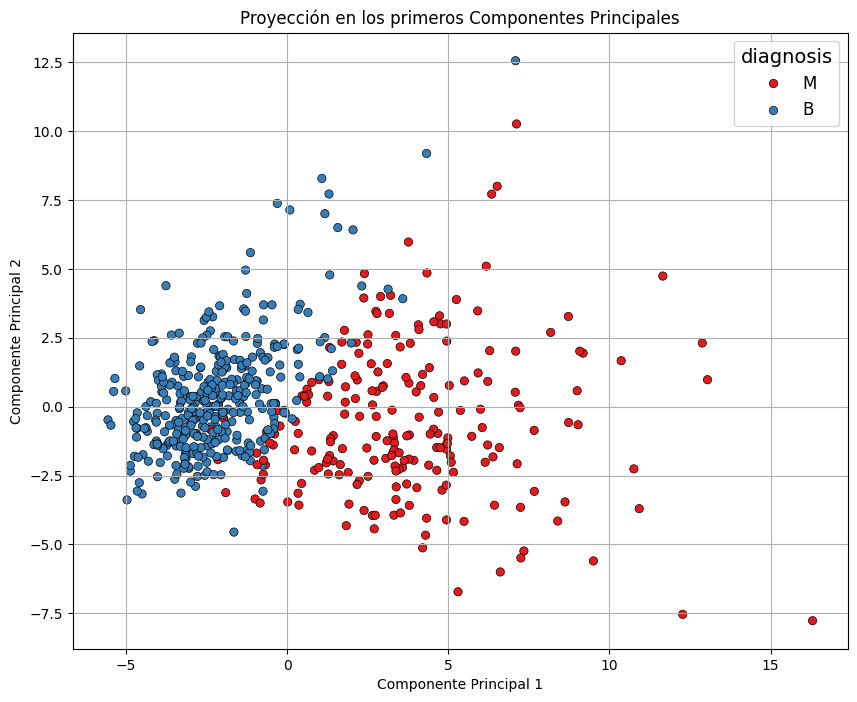

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=scores['CP1'],
    y=scores['CP2'],
    hue=scores[target],
    palette='Set1',
    edgecolor='k'
)
plt.title('Proyección en los primeros Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title=target, fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()

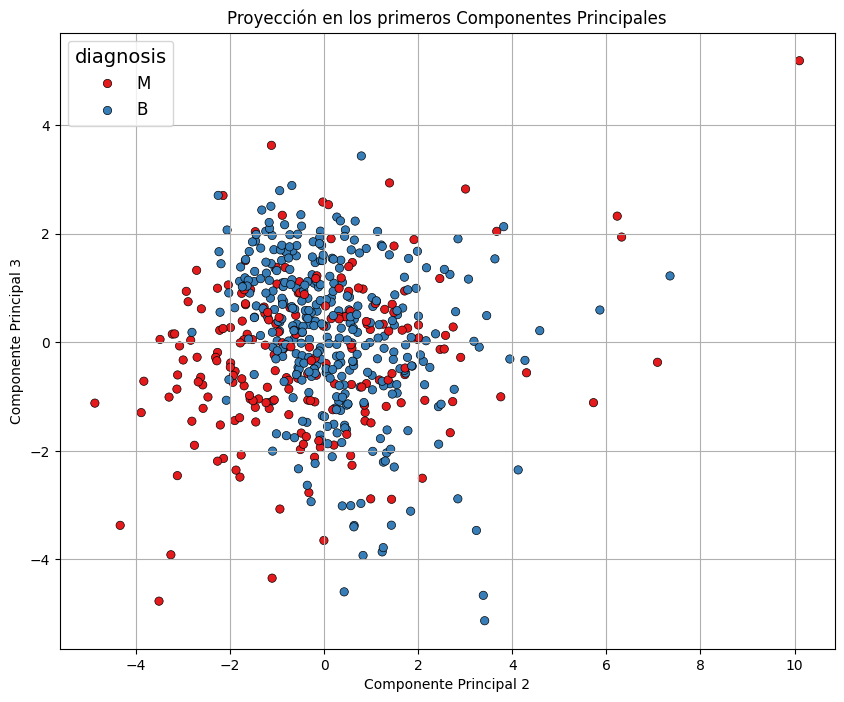

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=scores['CP3'],
    y=scores['CP4'],
    hue=scores[target],
    palette='Set1',
    edgecolor='k'
)
plt.title('Proyección en los primeros Componentes Principales')
plt.xlabel('Componente Principal 2')
plt.ylabel('Componente Principal 3')
plt.legend(title=target, fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()

**¿la reducción de dimensionalidad parece facilitar tareas de clasificación de los datos?** No es muy claro la separación de clases en los primeros componentes pero podemos ver que la clñase 5 y 7 se separan linealmente en los componentes PC2 y PC3

6. Grafica las variables en el espacio latente: el de sus coeficientes en cada una de las componentes principales. Interpreta.

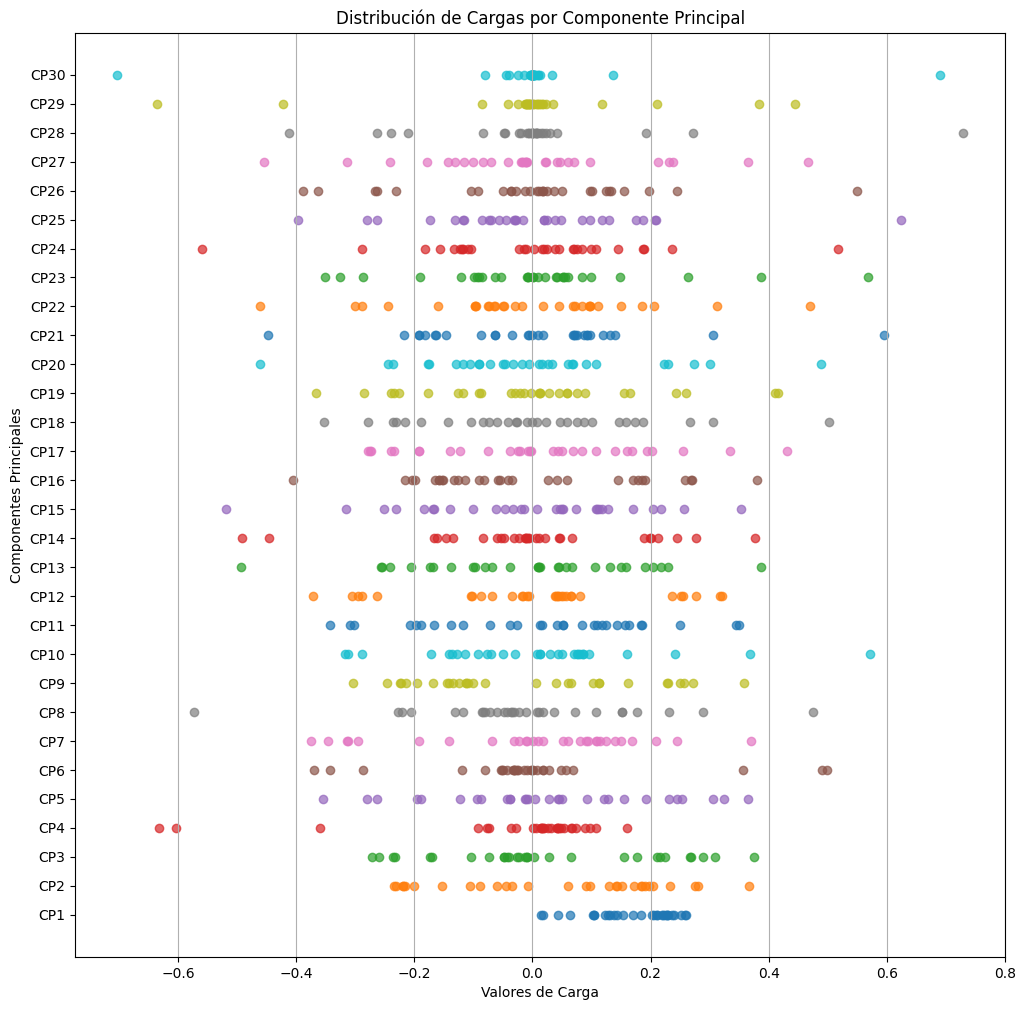

In [11]:
# Creamos la figura
plt.figure(figsize=(12, 12))

# Graficamos cada componente principal como un conjunto de puntos
for i, col in enumerate(loadings.columns, start=1):  # Enumeramos los CPs, empezando desde 1 para el eje y
    plt.scatter(loadings[col], [i] * len(loadings[col]), label=col, alpha=0.7)  # Eje x: valores de carga, eje y: índice del CP

# Ajustes de la gráfica
plt.yticks(range(1, len(loadings.columns) + 1), loadings.columns)  # Etiquetas del eje y con nombres de CPs
plt.xlabel('Valores de Carga')
plt.ylabel('Componentes Principales')
plt.title('Distribución de Cargas por Componente Principal')
plt.grid(axis='x')

plt.show()

## Parte II. Mínimos cuadrados

*Regresión generalizada*

Dados n puntos $(x_i,y_i)$, el objetivo es encontrar el polinomio de grado máximo $p$ que minimize la suma de los errores cuadrados:
$$min\sum_{i=1}^{n}(y_i-f(x_i))^2$$
Discute los casos:
$$f(x)=a_0+a_1x+a_2x^2+\dots+a_px^p$$
$$f(x)=a_0+a_1\cos{(x)}+a_2\cos{(2x)}+\dots+a_p\cos{(px)}$$

In [140]:
# Generar datos sintéticos
n = 1000  # Número de puntos de datos
x = np.linspace(0, 10, n)  # Valores de x distribuidos uniformemente
true_y = 2 + 3 * x - 1 * x**2 # y = 2 + 3x - x^2 + ruido
noise = np.random.normal(0, 5, size=n)
true_y_cosine = 2 + 3 * np.cos(x) + -1 * np.cos(2 * x) # y = 2 + 3cos(x) - cos(2x) + ruido
y = true_y + noise
y_cosine = true_y_cosine + noise

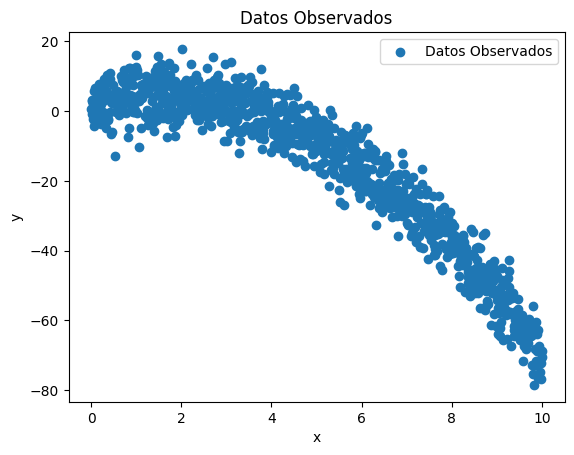

In [141]:
plt.scatter(x, y, label='Datos Observados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Observados')
plt.legend()
plt.show()

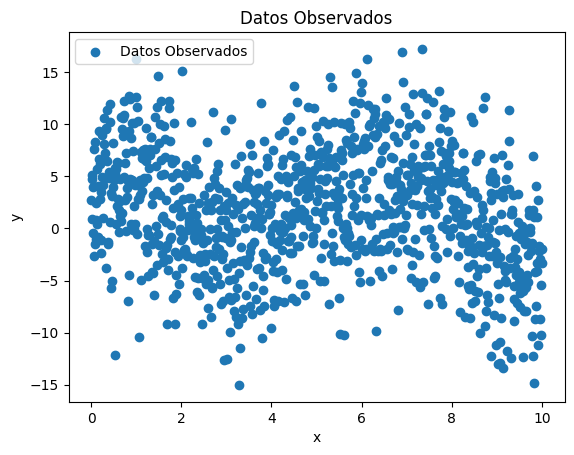

In [142]:
plt.scatter(x, y_cosine, label='Datos Observados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Observados')
plt.legend()
plt.show()

In [143]:
p = 2  # Grado del polinomio
# Inicializar la matriz de diseño A
A_poly = np.zeros((n, p + 1))

In [144]:
# Rellenar la matriz de diseño
for i in range(n):
    for j in range(p + 1):
        A_poly[i, j] = x[i] ** j

In [145]:
# Calcular A^T A y A^T y
AtA_poly = A_poly.T @ A_poly
AtY_poly = A_poly.T @ y

In [146]:
# Resolver para obtener los coeficientes del polinomio
coefficients_poly = np.linalg.solve(AtA_poly, AtY_poly)

In [147]:
# Valores de x para la gráfica suave del polinomio ajustado
x_fit = np.linspace(np.min(x), np.max(x), 100)

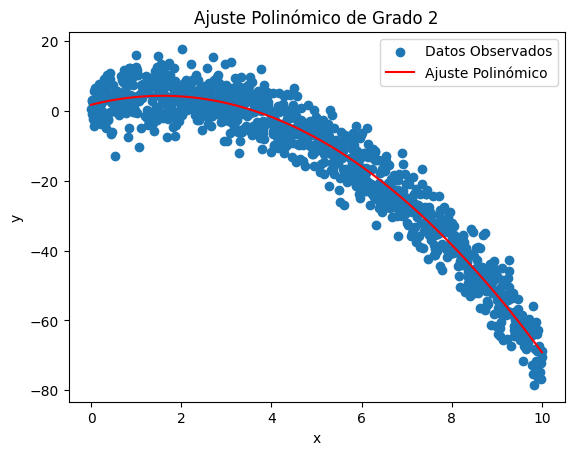

In [148]:
def polynomial(x_vals, coeffs):
    y_vals = np.zeros_like(x_vals)
    for j, a_j in enumerate(coeffs):
        y_vals += a_j * x_vals ** j
    return y_vals

y_fit_poly = polynomial(x_fit, coefficients_poly)

# Graficar los datos y el polinomio ajustado
plt.scatter(x, y, label='Datos Observados')
plt.plot(x_fit, y_fit_poly, 'r', label='Ajuste Polinómico')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Polinómico de Grado {}'.format(p))
plt.legend()
plt.show()


In [149]:
# Inicializar la matriz de diseño A para la serie de cosenos
A_cosine = np.zeros((n, p + 1))

# Rellenar la matriz de diseño
for i in range(n):
    A_cosine[i, 0] = 1  # Término constante a_0
    for j in range(1, p + 1):
        A_cosine[i, j] = np.cos(j * x[i])

In [150]:
# Calcular A^T A y A^T y
AtA_cosine = A_cosine.T @ A_cosine
AtY_cosine = A_cosine.T @ y_cosine

In [151]:
AtY_cosine

array([1719.36211547, 1543.63249746, -618.24396249])

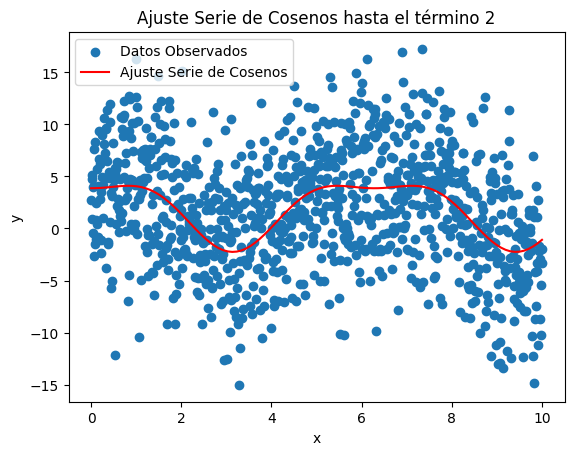

In [155]:

# Resolver para obtener los coeficientes de la serie de cosenos
coefficients_cosine = np.linalg.solve(AtA_cosine, AtY_cosine)
def cosine_series(x_vals, coeffs):
    y_vals = np.zeros_like(x_vals)
    y_vals += coeffs[0]  # Agregar el término constante a_0
    for j in range(1, len(coeffs)):
        y_vals += coeffs[j] * np.cos(j * x_vals)
    return y_vals
y_fit_cosine = cosine_series(x_fit, coefficients_cosine)

# Graficar los datos y el ajuste de la serie de cosenos
plt.scatter(x, y_cosine, label='Datos Observados')
plt.plot(x_fit, y_fit_cosine, 'r', label='Ajuste Serie de Cosenos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Serie de Cosenos hasta el término {}'.format(p))
plt.legend()
plt.show()


In [156]:
# SSE para el ajuste polinómico
y_poly_pred = polynomial(x, coefficients_poly)
residuals_poly = y - y_poly_pred
sse_poly = np.sum(residuals_poly ** 2)
print("Suma de Errores Cuadrados para el Ajuste Polinómico:", sse_poly)

# SSE para el ajuste de la serie de cosenos
y_cosine_pred = cosine_series(x, coefficients_cosine)
residuals_cosine = y_cosine - y_cosine_pred
sse_cosine = np.sum(residuals_cosine ** 2)
print("Suma de Errores Cuadrados para el Ajuste Serie de Cosenos:", sse_cosine)

Suma de Errores Cuadrados para el Ajuste Polinómico: 26115.07054732278
Suma de Errores Cuadrados para el Ajuste Serie de Cosenos: 26254.805978004522
